In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data= pd.read_csv("C:/Users/Dell/Downloads/Zomato data .csv")
print(data.head())


                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [4]:
info=data.sort_values(by=['rate'],ascending=False)
info.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
44,Onesta,Yes,Yes,4.6/5,2556,600,other
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
38,Empire Restaurant,Yes,No,4.4/5,4884,750,other


In [5]:
info=data.sort_values(by=['votes'],ascending=False)
info.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
38,Empire Restaurant,Yes,No,4.4/5,4884,750,other
86,Meghana Foods,Yes,No,4.4/5,4401,600,Dining
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes


In [6]:
info=data.sort_values(by=['approx_cost(for two people)'],ascending=True)
info.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
122,Coffee Bytes,No,No,3.1/5,6,100,Dining
127,Ruchi Maayaka,No,No,3.3/5,8,100,Dining
84,Chill Out,No,No,3.8/5,0,100,Dining


In [7]:
info=data['listed_in(type)'].value_counts()['Buffet']
print('Buffet',info)

Buffet 7


In [8]:
info=data['listed_in(type)'].value_counts()['Dining']
print('Dining',info)

Dining 110


In [9]:
info=data['listed_in(type)'].value_counts()['Cafes']
print('Cafes',info)

Cafes 23


In [10]:
info=data['listed_in(type)'].value_counts()['other']
print('other',info)

other 8


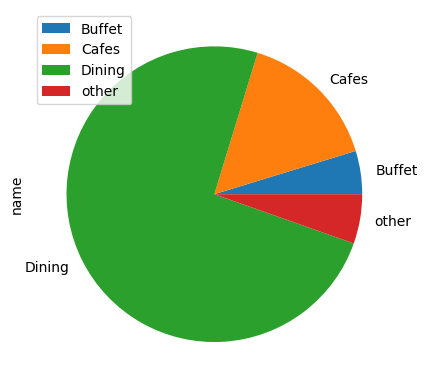

In [11]:
info=data.groupby('listed_in(type)').count()
info.plot(x="listed_in(type)",y="name",kind="pie")
plt.show()

Text(0, 0.5, 'Votes')

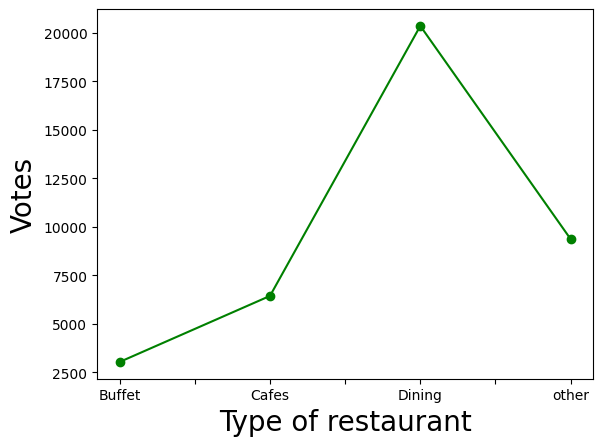

In [12]:
info= data.groupby('listed_in(type)')['votes'].sum()
info.plot(c="green", marker="o")
plt.xlabel("Type of restaurant", c="black", size=20)
plt.ylabel("Votes", c="black", size=20)


In [13]:
max_votes = data['votes'].max()
restaurant_with_max_votes = data.loc[data['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


In [14]:
info=data.groupby('online_order').count()
print(info)

              name  book_table  rate  votes  approx_cost(for two people)  \
online_order                                                               
No              90          90    90     90                           90   
Yes             58          58    58     58                           58   

              listed_in(type)  
online_order                   
No                         90  
Yes                        58  


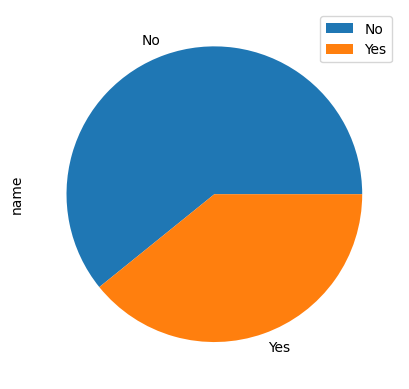

In [15]:
info.plot(x="online_order",y="name",kind="pie")
plt.show()

In [23]:
info = data[ (data['rate'] > '3.5') & (data['rate'] < '4')] 
print(info)

                                                name online_order book_table  \
2                                    San Churro Cafe          Yes         No   
3                              Addhuri Udupi Bhojana           No         No   
4                                      Grand Village           No         No   
5                                    Timepass Dinner          Yes         No   
6    Rosewood International Hotel - Bar & Restaurant           No         No   
..                                               ...          ...        ...   
101                                      Mane Thindi           No         No   
102                       Kotian Karavali Restaurant           No         No   
103                          Floured-Baked With Love           No         No   
105                                   Cakes & Slices           No         No   
147                                    Vijayalakshmi          Yes         No   

       rate  votes  approx_cost(for two

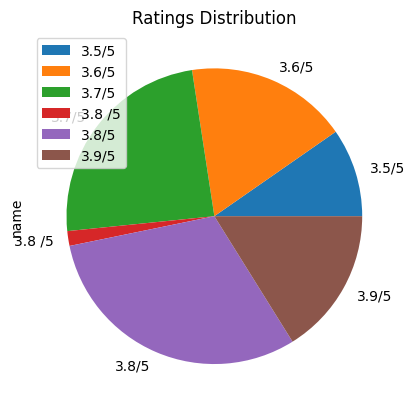

In [36]:
val=info.groupby('rate').count()
val.plot(x="rate",y="name",kind="pie")
plt.title("Ratings Distribution")
plt.show()


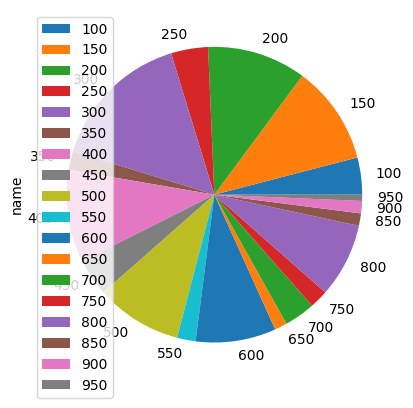

In [19]:
info=data.groupby('approx_cost(for two people)').count()
info.plot(x="approx_cost(for two people)",y="name",kind="pie")
plt.show()

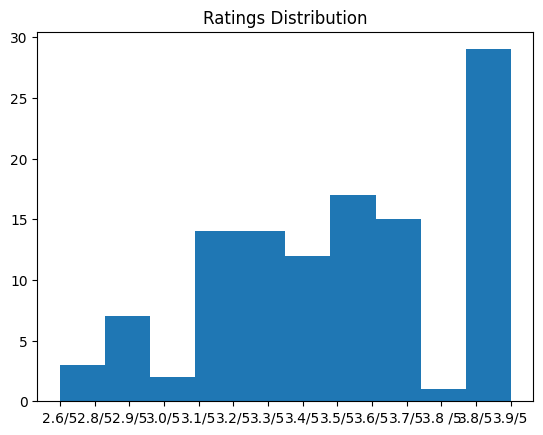

<Figure size 1000x900 with 0 Axes>

In [49]:
info = data[ (data['rate'] > '2.5') & (data['rate'] <= '4')] 
val=info.sort_values(by=["rate"],ascending=True)
plt.hist(val['rate'],bins=10)
plt.title("Ratings Distribution")
plt.figure(figsize=(10,9))
plt.show()


In [61]:
table=pd.pivot_table(data,index=['listed_in(type)','online_order','name'],values=['votes','rate'],aggfunc='sum')
print(table)

                                                                               rate  \
listed_in(type) online_order name                                                     
Buffet          No           Addhuri Udupi Bhojana                            3.7/5   
                             Grand Village                                    3.8/5   
                             Rosewood International Hotel - Bar & Restaurant  3.6/5   
                Yes          Jalsa                                            4.1/5   
                             San Churro Cafe                                  3.8/5   
...                                                                             ...   
other           Yes          Faasos                                           4.2/5   
                             Foodiction                                       2.8/5   
                             Onesta                                           4.6/5   
                             Penthouse Cafe

                              votes
listed_in(type) online_order       
Buffet          No              262
                Yes            2766
Cafes           No              762
                Yes            5672
Dining          No             5418
                Yes           14945
other           No              328
                Yes            9039


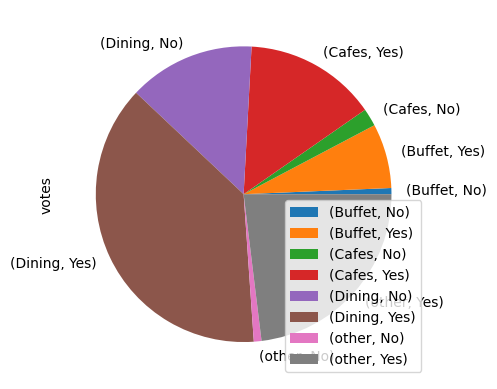

In [63]:
table=pd.pivot_table(data,index=['listed_in(type)','online_order'],values=['votes'],aggfunc='sum')
print(table)
table.plot(x="listed_in(type)",y="votes",kind="pie")
plt.show()